In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import summary_table
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # https://drive.google.com/open?id=1gupKl3IdsU4DabN2sFJ_orZhJuW9aJak
# downloaded = drive.CreateFile({'id':"1gupKl3IdsU4DabN2sFJ_orZhJuW9aJak"})
# downloaded.GetContentFile('new.csv')  
# # https://drive.google.com/open?id=1Z95-5CACHsWv_LpVLx9pTwbUHRKRpMjR
# data2 = drive.CreateFile({'id':"1Z95-5CACHsWv_LpVLx9pTwbUHRKRpMjR"})
# data2.GetContentFile('data.csv')  

# mal = pd.read_csv('data.csv')
# train = pd.read_csv('new.csv')

In [3]:
#@title
# mal = pd.read_csv('ProjectData/data.csv')
train = pd.read_csv('ProjectData/new.csv')
# a = pd.read_csv('ProjectData/android_traffic.csv', sep=';')

C:\Users\Bibi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#@title
# a.head()

In [5]:
train.head()

MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1341.0       0               7.0                 0   
3  4.18.1807.18075  1.273.1527.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    53447.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    53447.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           36144.0                           0   
1                           57858.0                           0   
2                           52682.0                           0   
3                           20050.0                           0   
4                           19844.0                           0   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      NaN                     0.0                      0   
2                      NaN                     0.0                      0   
3                      NaN                     0.0                      0   
4                      0.0                     0.0                      0   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           0.0   
2                    0                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           0.0   

  Wdft_RegionIdentifier HasDetections  
0                  10.0             0  
1                   8.0             0  
2                   3.0             0  
3                   3.0             1  
4                   1.0             1  

[5 rows x 83 columns]

In [6]:
train.tail()

MachineIdentifier   ProductName EngineVersion  \
19994  0093a9ee4b31f890896bea6a00bd3f68  win8defender   1.1.14306.0   
19995  0093aa0560feb128b19f50d2b9f9bdf7  win8defender   1.1.15100.1   
19996  0093aaaa269e5959537b9e50d511f059  win8defender   1.1.15100.1   
19997  0093ad3dadbb0293f9a24dcbb3e5ba27  win8defender   1.1.15200.1   
19998  0093ad79d2597aca613b4c04787d6974  win8defender   1.1.15100.1   

            AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
19994   4.9.10586.1106   1.257.429.0       0               7.0   
19995  4.18.1806.18062   1.273.293.0       0               7.0   
19996  4.18.1806.18062   1.273.526.0       0               7.0   
19997  4.18.1807.18075  1.275.1382.0       0               7.0   
19998  4.18.1806.18062    1.273.17.0       0               7.0   

       IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
19994                 0                     1991.0                    53447.0   
19995                 0                        NaN                    47238.0   
19996                 0                        NaN                    53447.0   
19997                 0                        NaN                    53447.0   
19998                 0                        NaN                    53447.0   

       ...  Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
19994  ...                           65509.0                           0   
19995  ...                           69870.0                           1   
19996  ...                            8622.0                           0   
19997  ...                           63269.0                           0   
19998  ...                            9532.0                           0   

       Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
19994                      NaN                     0.0                      0   
19995                      NaN                     0.0                      0   
19996                      NaN                     0.0                      0   
19997                      0.0                     0.0                      0   
19998                      0.0                     0.0                      0   

       Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  \
19994                    0                                      0.0   
19995                    0                                      0.0   
19996                    0                                      0.0   
19997                    0                                      0.0   
19998                    0                                      0.0   

       Wdft_IsGamer Wdft_RegionIdentifier HasDetections  
19994           1.0                   3.0             1  
19995           0.0                  15.0             0  
19996           1.0                   3.0             1  
19997           0.0                   3.0             0  
19998           0.0                   1.0             1  

[5 rows x 83 columns]

In [7]:
train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 83, dtype: object

In [8]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

# Dropping Columns with majority missing values

In [9]:
df = train.drop(['AutoSampleOptIn','Census_InternalBatteryNumberOfCharges','Census_InternalBatteryType',
                 'Census_IsFlightingInternal','Census_IsFlightsDisabled','Census_IsWIMBootEnabled',
                 'Census_ProcessorClass','Census_ThresholdOptIn','DefaultBrowsersIdentifier',
                 'IsBeta','ProductName','PuaMode','UacLuaenable','SMode', 'Census_IsVirtualDevice',
                 'Census_IsPortableOperatingSystem', 'Platform', 'Census_DeviceFamily', 'Census_OSSkuName',
                 'Census_OSInstallLanguageIdentifier', 'Processor'], axis=1)

In [10]:
df.head()

MachineIdentifier EngineVersion       AppVersion  \
0  0000028988387b115f69f31a3bf04f09   1.1.15100.1  4.18.1807.18075   
1  000007535c3f730efa9ea0b7ef1bd645   1.1.14600.4     4.13.17134.1   
2  000007905a28d863f6d0d597892cd692   1.1.15100.1  4.18.1807.18075   
3  00000b11598a75ea8ba1beea8459149f   1.1.15100.1  4.18.1807.18075   
4  000014a5f00daa18e76b81417eeb99fc   1.1.15100.1  4.18.1807.18075   

   AvSigVersion  RtpStateBitfield  IsSxsPassiveMode  \
0  1.273.1735.0               7.0                 0   
1    1.263.48.0               7.0                 0   
2  1.273.1341.0               7.0                 0   
3  1.273.1527.0               7.0                 0   
4  1.273.1379.0               7.0                 0   

   AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  HasTpm  \
0                    53447.0                  1.0                1.0       1   
1                    53447.0                  1.0                1.0       1   
2                    53447.0                  1.0                1.0       1   
3                    53447.0                  1.0                1.0       1   
4                    53447.0                  1.0                1.0       1   

   ...  Census_FlightRing  Census_FirmwareManufacturerIdentifier  \
0  ...             Retail                                  628.0   
1  ...            NOT_SET                                  628.0   
2  ...             Retail                                  142.0   
3  ...             Retail                                  355.0   
4  ...             Retail                                  355.0   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           36144.0                           0   
1                           57858.0                           0   
2                           52682.0                           0   
3                           20050.0                           0   
4                           19844.0                           0   

   Census_IsTouchEnabled Census_IsPenCapable  \
0                      0                   0   
1                      0                   0   
2                      0                   0   
3                      0                   0   
4                      0                   0   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           0.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           0.0   

  Wdft_RegionIdentifier HasDetections  
0                  10.0             0  
1                   8.0             0  
2                   3.0             0  
3                   3.0             1  
4                   1.0             1  

[5 rows x 62 columns]

In [11]:
df.corr()

RtpStateBitfield  \
RtpStateBitfield                                           1.000000   
IsSxsPassiveMode                                          -0.874674   
AVProductStatesIdentifier                                  0.105221   
AVProductsInstalled                                       -0.177578   
AVProductsEnabled                                          0.014739   
HasTpm                                                     0.003940   
CountryIdentifier                                          0.004290   
CityIdentifier                                            -0.006765   
OrganizationIdentifier                                     0.012501   
GeoNameIdentifier                                          0.010630   
LocaleEnglishNameIdentifier                                0.003749   
OsBuild                                                   -0.017723   
OsSuite                                                   -0.011223   
IsProtected                                                0.052466   
IeVerIdentifier                                           -0.037215   
Firewall                                                  -0.000937   
Census_OEMNameIdentifier                                  -0.003539   
Census_OEMModelIdentifier                                 -0.003030   
Census_ProcessorCoreCount                                 -0.020949   
Census_ProcessorManufacturerIdentifier                     0.002181   
Census_ProcessorModelIdentifier                           -0.001647   
Census_PrimaryDiskTotalCapacity                           -0.020247   
Census_SystemVolumeTotalCapacity                          -0.007467   
Census_HasOpticalDiskDrive                                 0.001261   
Census_TotalPhysicalRAM                                   -0.026379   
Census_InternalPrimaryDiagonalDisplaySizeInInches         -0.003655   
Census_InternalPrimaryDisplayResolutionHorizontal         -0.017618   
Census_InternalPrimaryDisplayResolutionVertical           -0.009265   
Census_OSBuildNumber                                      -0.025789   
Census_OSBuildRevision                                     0.017303   
Census_OSUILocaleIdentifier                               -0.012416   
Census_FirmwareManufacturerIdentifier                      0.000885   
Census_FirmwareVersionIdentifier                           0.007364   
Census_IsSecureBootEnabled                                -0.011144   
Census_IsTouchEnabled                                      0.010705   
Census_IsPenCapable                                        0.010730   
Census_IsAlwaysOnAlwaysConnectedCapable                    0.019895   
Wdft_IsGamer                                              -0.025864   
Wdft_RegionIdentifier                                     -0.007479   
HasDetections                                              0.034995   

                                                   IsSxsPassiveMode  \
RtpStateBitfield                                          -0.874674   
IsSxsPassiveMode                                           1.000000   
AVProductStatesIdentifier                                 -0.110828   
AVProductsInstalled                                        0.192052   
AVProductsEnabled                                          0.038362   
HasTpm                                                     0.010245   
CountryIdentifier                                         -0.011678   
CityIdentifier                                             0.004954   
OrganizationIdentifier                                    -0.010220   
GeoNameIdentifier                                         -0.015481   
LocaleEnglishNameIdentifier                               -0.014635   
OsBuild                                                    0.048808   
OsSuite                                                    0.015529   
IsProtected                                               -0.018175   
IeVerIdentifier                                            0.000285   
Fir

In [12]:
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
# X = df[df.columns[:-1]].values
# y = df[df.columns[-1]].values
# # y = train['HasDetections']
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=3)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.2, random_state=3)
# X_train.shape, X_valid.shape, X_test.shape

# Binary Features:
'Census_HasOpticalDiskDrive', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Census_IsPenCapable', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Firewall', 'HasTpm', 'IsProtected', 'IsSxsPassiveMode', 'Wdft_IsGamer'

In [13]:
binary = df[['Census_HasOpticalDiskDrive', 
          'Census_IsAlwaysOnAlwaysConnectedCapable', 'Census_IsPenCapable',
          'Census_IsSecureBootEnabled', 
          'Census_IsTouchEnabled', 
          'Firewall', 'HasTpm', 'IsProtected', 'IsSxsPassiveMode', 
          'Wdft_IsGamer']]
binary

Census_HasOpticalDiskDrive  Census_IsAlwaysOnAlwaysConnectedCapable  \
0                               0                                      0.0   
1                               0                                      0.0   
2                               0                                      0.0   
3                               0                                      0.0   
4                               0                                      0.0   
...                           ...                                      ...   
19994                           0                                      0.0   
19995                           0                                      0.0   
19996                           0                                      0.0   
19997                           0                                      0.0   
19998                           0                                      0.0   

       Census_IsPenCapable  Census_IsSecureBootEnabled  Census_IsTouchEnabled  \
0                        0                           0                      0   
1                        0                           0                      0   
2                        0                           0                      0   
3                        0                           0                      0   
4                        0                           0                      0   
...                    ...                         ...                    ...   
19994                    0                           0                      0   
19995                    0                           1                      0   
19996                    0                           0                      0   
19997                    0                           0                      0   
19998                    0                           0                      0   

       Firewall  HasTpm  IsProtected  IsSxsPassiveMode  Wdft_IsGamer  
0           1.0       1          1.0                 0           0.0  
1           1.0       1          1.0                 0           0.0  
2           1.0       1          1.0                 0           0.0  
3           1.0       1          1.0                 0           0.0  
4           1.0       1          1.0                 0           0.0  
...         ...     ...          ...               ...           ...  
19994       1.0       1          1.0                 0           1.0  
19995       1.0       1          1.0                 0           0.0  
19996       1.0       1          1.0                 0           1.0  
19997       1.0       1          1.0                 0           0.0  
19998       1.0       1          1.0                 0           0.0  

[19999 rows x 10 columns]

'Census_IsAlwaysOnAlwaysConnectedCapable'
'Census_IsVirtualDevice'
'Firewall'
'IsProtected'
'SMode'
'Wdft_IsGamer'

In [14]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(df['Census_IsAlwaysOnAlwaysConnectedCapable'].mode()[0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19994    0.0
19995    0.0
19996    0.0
19997    0.0
19998    0.0
Name: Census_IsAlwaysOnAlwaysConnectedCapable, Length: 19999, dtype: float64

In [15]:
df.loc[[342],'Census_IsAlwaysOnAlwaysConnectedCapable']

342    0.0
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: float64

In [16]:
df['Firewall'].fillna(df['Firewall'].mode()[0])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
19994    1.0
19995    1.0
19996    1.0
19997    1.0
19998    1.0
Name: Firewall, Length: 19999, dtype: float64

In [17]:
df.loc[[573], 'Firewall']

573    1.0
Name: Firewall, dtype: float64

In [18]:
df['IsProtected'].fillna(df['IsProtected'].mode()[0])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
19994    1.0
19995    1.0
19996    1.0
19997    1.0
19998    1.0
Name: IsProtected, Length: 19999, dtype: float64

In [19]:
df.loc[[898], 'IsProtected']

898    1.0
Name: IsProtected, dtype: float64

In [20]:
df['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19994    1.0
19995    0.0
19996    1.0
19997    0.0
19998    0.0
Name: Wdft_IsGamer, Length: 19999, dtype: float64

In [21]:
df.loc[[66], 'Wdft_IsGamer']

66    0.0
Name: Wdft_IsGamer, dtype: float64

In [22]:
df.loc[[93], 'Wdft_IsGamer']

93    0.0
Name: Wdft_IsGamer, dtype: float64

In [23]:
binary

Census_HasOpticalDiskDrive  Census_IsAlwaysOnAlwaysConnectedCapable  \
0                               0                                      0.0   
1                               0                                      0.0   
2                               0                                      0.0   
3                               0                                      0.0   
4                               0                                      0.0   
...                           ...                                      ...   
19994                           0                                      0.0   
19995                           0                                      0.0   
19996                           0                                      0.0   
19997                           0                                      0.0   
19998                           0                                      0.0   

       Census_IsPenCapable  Census_IsSecureBootEnabled  Census_IsTouchEnabled  \
0                        0                           0                      0   
1                        0                           0                      0   
2                        0                           0                      0   
3                        0                           0                      0   
4                        0                           0                      0   
...                    ...                         ...                    ...   
19994                    0                           0                      0   
19995                    0                           1                      0   
19996                    0                           0                      0   
19997                    0                           0                      0   
19998                    0                           0                      0   

       Firewall  HasTpm  IsProtected  IsSxsPassiveMode  Wdft_IsGamer  
0           1.0       1          1.0                 0           0.0  
1           1.0       1          1.0                 0           0.0  
2           1.0       1          1.0                 0           0.0  
3           1.0       1          1.0                 0           0.0  
4           1.0       1          1.0                 0           0.0  
...         ...     ...          ...               ...           ...  
19994       1.0       1          1.0                 0           1.0  
19995       1.0       1          1.0                 0           0.0  
19996       1.0       1          1.0                 0           1.0  
19997       1.0       1          1.0                 0           0.0  
19998       1.0       1          1.0                 0           0.0  

[19999 rows x 10 columns]

In [24]:
binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 10 columns):
Census_HasOpticalDiskDrive                 19999 non-null int64
Census_IsAlwaysOnAlwaysConnectedCapable    19836 non-null float64
Census_IsPenCapable                        19999 non-null int64
Census_IsSecureBootEnabled                 19999 non-null int64
Census_IsTouchEnabled                      19999 non-null int64
Firewall                                   19784 non-null float64
HasTpm                                     19999 non-null int64
IsProtected                                19917 non-null float64
IsSxsPassiveMode                           19999 non-null int64
Wdft_IsGamer                               19349 non-null float64
dtypes: float64(4), int64(6)
memory usage: 1.5 MB


# Numerical Features:
'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_PrimaryDiskTotalCapacity', 'Census_ProcessorCoreCount', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM' 

In [25]:
numeric = df[['Census_InternalPrimaryDiagonalDisplaySizeInInches',
           'Census_PrimaryDiskTotalCapacity', 
           'Census_ProcessorCoreCount', 
           'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM' ]]
numeric

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                                   18.9   
1                                                   13.9   
2                                                   21.5   
3                                                   18.5   
4                                                   14.0   
...                                                  ...   
19994                                               46.0   
19995                                               15.5   
19996                                               18.9   
19997                                               10.0   
19998                                               13.9   

       Census_PrimaryDiskTotalCapacity  Census_ProcessorCoreCount  \
0                             476940.0                        4.0   
1                             476940.0                        4.0   
2                             114473.0                        4.0   
3                             238475.0                        4.0   
4                             476940.0                        4.0   
...                                ...                        ...   
19994                         305245.0                        4.0   
19995                         953869.0                        2.0   
19996                         476940.0                        2.0   
19997                         305245.0                        4.0   
19998                         953869.0                        8.0   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  
0                              299451.0                   4096.0  
1                              102385.0                   4096.0  
2                              113907.0                   4096.0  
3                              227116.0                   4096.0  
4                              101900.0                   6144.0  
...                                 ...                      ...  
19994                           54674.0                   4096.0  
19995                          952792.0                   4096.0  
19996                          476389.0                   8192.0  
19997                          291831.0                   1024.0  
19998                          398672.0                   4096.0  

[19999 rows x 5 columns]

In [26]:
num_null = pd.isnull(numeric)
num_null

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                                  False   
1                                                  False   
2                                                  False   
3                                                  False   
4                                                  False   
...                                                  ...   
19994                                              False   
19995                                              False   
19996                                              False   
19997                                              False   
19998                                              False   

       Census_PrimaryDiskTotalCapacity  Census_ProcessorCoreCount  \
0                                False                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                False                      False   
...                                ...                        ...   
19994                            False                      False   
19995                            False                      False   
19996                            False                      False   
19997                            False                      False   
19998                            False                      False   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  
0                                 False                    False  
1                                 False                    False  
2                                 False                    False  
3                                 False                    False  
4                                 False                    False  
...                                 ...                      ...  
19994                             False                    False  
19995                             False                    False  
19996                             False                    False  
19997                             False                    False  
19998                             False                    False  

[19999 rows x 5 columns]

In [27]:
df['Census_TotalPhysicalRAM'].fillna(df['Census_TotalPhysicalRAM'].mean(), inplace=True)

In [28]:
# mean = df['Census_TotalPhysicalRAM'].mean()
# df['Census_TotalPhysicalRAM'].fillna(value=mean, inplace=True)

In [29]:
# df.loc[[123],'Census_TotalPhysicalRAM'].astype(float)

In [30]:
print(df.loc[[123], 'Census_TotalPhysicalRAM'])

123    6137.51047
Name: Census_TotalPhysicalRAM, dtype: float64


In [31]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(
    df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].mean(), inplace=True)

In [32]:
df['Census_PrimaryDiskTotalCapacity'].fillna(df['Census_PrimaryDiskTotalCapacity'].mean(), inplace=True)

In [33]:
df['Census_ProcessorCoreCount'].fillna(df['Census_ProcessorCoreCount'].mean(), inplace=True)

In [34]:
df['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].mean(), inplace=True)

In [35]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 5 columns):
Census_InternalPrimaryDiagonalDisplaySizeInInches    19875 non-null float64
Census_PrimaryDiskTotalCapacity                      19882 non-null float64
Census_ProcessorCoreCount                            19916 non-null float64
Census_SystemVolumeTotalCapacity                     19882 non-null float64
Census_TotalPhysicalRAM                              19819 non-null float64
dtypes: float64(5)
memory usage: 781.3 KB


# Normalization 

'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_PrimaryDiskTotalCapacity', 'Census_ProcessorCoreCount', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM' 

In [36]:
numeric.head()

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                               18.9   
1                                               13.9   
2                                               21.5   
3                                               18.5   
4                                               14.0   

   Census_PrimaryDiskTotalCapacity  Census_ProcessorCoreCount  \
0                         476940.0                        4.0   
1                         476940.0                        4.0   
2                         114473.0                        4.0   
3                         238475.0                        4.0   
4                         476940.0                        4.0   

   Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  
0                          299451.0                   4096.0  
1                          102385.0                   4096.0  
2                          113907.0                   4096.0  
3                          227116.0                   4096.0  
4                          101900.0                   6144.0

In [37]:
# numNorm = (df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] - df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].mean())/df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].std()
# numNorm

In [38]:
numZNorm = (numeric - numeric.mean())/numeric.std()
numZNorm

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                               0.373434   
1                                              -0.474609   
2                                               0.814417   
3                                               0.305591   
4                                              -0.457648   
...                                                  ...   
19994                                           4.969831   
19995                                          -0.203235   
19996                                           0.373434   
19997                                          -1.136083   
19998                                          -0.474609   

       Census_PrimaryDiskTotalCapacity  Census_ProcessorCoreCount  \
0                            -0.098898                   0.003632   
1                            -0.098898                   0.003632   
2                            -1.130736                   0.003632   
3                            -0.777738                   0.003632   
4                            -0.098898                   0.003632   
...                                ...                        ...   
19994                        -0.587663                   0.003632   
19995                         1.258780                  -0.980498   
19996                        -0.098898                  -0.980498   
19997                        -0.587663                   0.003632   
19998                         1.258780                   1.971892   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  
0                             -0.240158                -0.433941  
1                             -0.857450                -0.433941  
2                             -0.821358                -0.433941  
3                             -0.466741                -0.433941  
4                             -0.858969                 0.001379  
...                                 ...                      ...  
19994                         -1.006900                -0.433941  
19995                          1.806375                -0.433941  
19996                          0.314084                 0.436700  
19997                         -0.264027                -1.086922  
19998                          0.070643                -0.433941  

[19999 rows x 5 columns]

In [39]:
numMeanNorm = (numeric - numeric.min())/(numeric.max()-numeric.min())
numMeanNorm

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                               0.183246   
1                                               0.117801   
2                                               0.217277   
3                                               0.178010   
4                                               0.119110   
...                                                  ...   
19994                                           0.537958   
19995                                           0.138743   
19996                                           0.183246   
19997                                           0.066754   
19998                                           0.117801   

       Census_PrimaryDiskTotalCapacity  Census_ProcessorCoreCount  \
0                             0.122546                   0.076923   
1                             0.122546                   0.076923   
2                             0.027280                   0.076923   
3                             0.059871                   0.076923   
4                             0.122546                   0.076923   
...                                ...                        ...   
19994                         0.077420                   0.076923   
19995                         0.247897                   0.025641   
19996                         0.122546                   0.025641   
19997                         0.077420                   0.076923   
19998                         0.247897                   0.179487   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  
0                              0.101503                 0.027451  
1                              0.032366                 0.027451  
2                              0.036408                 0.027451  
3                              0.076125                 0.027451  
4                              0.032196                 0.043137  
...                                 ...                      ...  
19994                          0.015628                 0.027451  
19995                          0.330714                 0.027451  
19996                          0.163578                 0.058824  
19997                          0.098829                 0.003922  
19998                          0.136312                 0.027451  

[19999 rows x 5 columns]

In [40]:
numMinMaxNorm = (numeric - numeric.min()) / (numeric.max() - numeric.min())
numMinMaxNorm

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                               0.183246   
1                                               0.117801   
2                                               0.217277   
3                                               0.178010   
4                                               0.119110   
...                                                  ...   
19994                                           0.537958   
19995                                           0.138743   
19996                                           0.183246   
19997                                           0.066754   
19998                                           0.117801   

       Census_PrimaryDiskTotalCapacity  Census_ProcessorCoreCount  \
0                             0.122546                   0.076923   
1                             0.122546                   0.076923   
2                             0.027280                   0.076923   
3                             0.059871                   0.076923   
4                             0.122546                   0.076923   
...                                ...                        ...   
19994                         0.077420                   0.076923   
19995                         0.247897                   0.025641   
19996                         0.122546                   0.025641   
19997                         0.077420                   0.076923   
19998                         0.247897                   0.179487   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  
0                              0.101503                 0.027451  
1                              0.032366                 0.027451  
2                              0.036408                 0.027451  
3                              0.076125                 0.027451  
4                              0.032196                 0.043137  
...                                 ...                      ...  
19994                          0.015628                 0.027451  
19995                          0.330714                 0.027451  
19996                          0.163578                 0.058824  
19997                          0.098829                 0.003922  
19998                          0.136312                 0.027451  

[19999 rows x 5 columns]

In [41]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 5 columns):
Census_InternalPrimaryDiagonalDisplaySizeInInches    19875 non-null float64
Census_PrimaryDiskTotalCapacity                      19882 non-null float64
Census_ProcessorCoreCount                            19916 non-null float64
Census_SystemVolumeTotalCapacity                     19882 non-null float64
Census_TotalPhysicalRAM                              19819 non-null float64
dtypes: float64(5)
memory usage: 781.3 KB


# Categorical Features:
'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled',  'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier',  'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', **'OsBuildLab'**, **'SkuEdition'**, 'IeVerIdentifier', 'SmartScreen', **'Census_MDC2FormFactor'**, 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTypeName', *'Census_ChassisTypeName'*, 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', **'Census_PowerPlatformRoleName'**, **'Census_OSVersion'**, 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition', 'Census_OSInstallTypeName', 'Census_OSUILocaleIdentifier', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier',  'Wdft_RegionIdentifier', 'HasDetections'

**OsBuild** - Build of the current operating system

**SkuEdition** - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.

**Census_MDC2FormFactor** - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)

**Census_PowerPlatformRoleName** - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device

**Census_OSVersion** - Numeric OS version Example - 10.0.10130.0

In [42]:
category = df[['OsBuild', 'SkuEdition', 
                     'Census_MDC2FormFactor', 'Census_PowerPlatformRoleName', 'Census_OSVersion']]
category

OsBuild SkuEdition Census_MDC2FormFactor Census_PowerPlatformRoleName  \
0        17134        Pro               Desktop                      Desktop   
1        17134        Pro              Notebook                       Mobile   
2        17134       Home               Desktop                      Desktop   
3        17134        Pro               Desktop                      Desktop   
4        17134       Home              Notebook                       Mobile   
...        ...        ...                   ...                          ...   
19994    10586        Pro               Desktop                      Desktop   
19995    14393       Home              Notebook                       Mobile   
19996    17134       Home               Desktop                      Desktop   
19997    16299       Home              Notebook                       Mobile   
19998    16299       Home              Notebook                       Mobile   

      Census_OSVersion  
0       10.0.17134.165  
1         10.0.17134.1  
2       10.0.17134.165  
3       10.0.17134.228  
4       10.0.17134.191  
...                ...  
19994  10.0.10586.1176  
19995   10.0.14393.351  
19996   10.0.17134.165  
19997   10.0.16299.461  
19998   10.0.16299.492  

[19999 rows x 5 columns]

In [43]:
df['OsBuild'] = pd.factorize(df['OsBuild'])[0] + 1
df['OsBuild'].tail(10)

19989    1
19990    3
19991    1
19992    6
19993    1
19994    8
19995    2
19996    1
19997    3
19998    3
Name: OsBuild, dtype: int64

In [44]:
df['OsBuild'].head()

0    1
1    1
2    1
3    1
4    1
Name: OsBuild, dtype: int64

*SkuEdition: Has invalid, home enterprise, pro, and home* 

In [45]:
df['SkuEdition'] = pd.factorize(df['SkuEdition'])[0] + 1
df['SkuEdition'].head(10)

0    1
1    1
2    2
3    1
4    2
5    1
6    2
7    2
8    1
9    2
Name: SkuEdition, dtype: int64

In [46]:
#hardware
df['Census_MDC2FormFactor'] = pd.factorize(df['Census_MDC2FormFactor'])[0] + 1
df['Census_MDC2FormFactor'].head(10)

0    1
1    2
2    1
3    1
4    2
5    1
6    2
7    2
8    2
9    2
Name: Census_MDC2FormFactor, dtype: int64

In [47]:
df['Census_PowerPlatformRoleName'].replace(['UNKNOWN'], '0', inplace=True)
df['Census_PowerPlatformRoleName'] = pd.factorize(df['Census_PowerPlatformRoleName'])[0] + 1
df['Census_PowerPlatformRoleName'].head(10)

0    1
1    2
2    1
3    1
4    2
5    1
6    2
7    2
8    2
9    2
Name: Census_PowerPlatformRoleName, dtype: int64

In [48]:
df.loc[[340], 'Census_PowerPlatformRoleName'].astype(int)

340    6
Name: Census_PowerPlatformRoleName, dtype: int32

In [49]:
df['Census_OSVersion'] = pd.factorize(df['Census_OSVersion'])[0] + 1
df['Census_OSVersion'].head(10)

0    1
1    2
2    1
3    3
4    4
5    1
6    1
7    5
8    6
9    7
Name: Census_OSVersion, dtype: int64

In [50]:
# new_cat = df[['Version', 'Device', 'Build', 'Hardware', 'ProductType']]
# new_cat.head()

In [51]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 5 columns):
OsBuild                         19999 non-null int64
SkuEdition                      19999 non-null object
Census_MDC2FormFactor           19999 non-null object
Census_PowerPlatformRoleName    19999 non-null object
Census_OSVersion                19999 non-null object
dtypes: int64(1), object(4)
memory usage: 781.3+ KB


# Extra Cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 62 columns):
MachineIdentifier                                    19999 non-null object
EngineVersion                                        19999 non-null object
AppVersion                                           19999 non-null object
AvSigVersion                                         19999 non-null object
RtpStateBitfield                                     19928 non-null float64
IsSxsPassiveMode                                     19999 non-null int64
AVProductStatesIdentifier                            19916 non-null float64
AVProductsInstalled                                  19916 non-null float64
AVProductsEnabled                                    19916 non-null float64
HasTpm                                               19999 non-null int64
CountryIdentifier                                    19999 non-null int64
CityIdentifier                                       19260 non-nu

In [53]:
df.drop('MachineIdentifier', axis=1, inplace=True)

In [54]:
df.drop('EngineVersion', axis=1, inplace=True)

In [55]:
df['SmartScreen']
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'DNE'
}
df.replace({'SmartScreen': trans_dict}, inplace=True)

In [56]:
df.SmartScreen.isnull().sum()

0

In [57]:
df['SmartScreen']

0                 DNE
1                 DNE
2        RequireAdmin
3        ExistsNotSet
4        RequireAdmin
             ...     
19994    RequireAdmin
19995    RequireAdmin
19996             DNE
19997    RequireAdmin
19998    RequireAdmin
Name: SmartScreen, Length: 19999, dtype: object

In [58]:
df.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [59]:
df.shape

(19999, 60)

In [60]:
df.dropna(inplace=True)
df.shape

(17588, 60)

In [61]:
df['AppVersion'] = pd.factorize(df['AppVersion'])[0] + 1
df['AppVersion'].head(10)

0     1
1     2
2     1
3     1
4     1
5     1
6     1
7     1
8     1
10    1
Name: AppVersion, dtype: int64

In [62]:
df['AvSigVersion'] = df.AvSigVersion.astype('category')
df['OsVer'] = df.OsVer.astype('category')
df['OsPlatformSubRelease'] = df.OsPlatformSubRelease.astype('category')
df['OsBuildLab'] = df.OsBuildLab.astype('category')
df['SkuEdition'] = df.SkuEdition.astype('category')
df['SmartScreen'] = df.SmartScreen.astype('category')
df['Census_MDC2FormFactor'] = df.Census_MDC2FormFactor.astype('category')
df['Census_PrimaryDiskTypeName'] = df.Census_PrimaryDiskTypeName.astype('category')
df['Census_ChassisTypeName'] = df.Census_ChassisTypeName.astype('category')
df['Census_PowerPlatformRoleName'] = df.Census_PowerPlatformRoleName.astype('category')
df['Census_OSVersion'] = df.Census_OSVersion.astype('category')
df['Census_OSArchitecture'] = df.Census_OSArchitecture.astype('category')
df['Census_OSBranch'] = df.Census_OSBranch.astype('category')
df['Census_OSBuildNumber'] = df.Census_OSBuildNumber.astype('category')
df['Census_OSEdition'] = df.Census_OSEdition.astype('category')
df['Census_OSInstallTypeName'] = df.Census_OSInstallTypeName.astype('category')
df['Census_OSWUAutoUpdateOptionsName'] = df.Census_OSWUAutoUpdateOptionsName.astype('category')
df['Census_GenuineStateName'] = df.Census_GenuineStateName.astype('category')
df['Census_ActivationChannel'] = df.Census_ActivationChannel.astype('category')
df['Census_FlightRing'] = df.Census_FlightRing.astype('category')
df['AppVersion'] = df.AppVersion.astype('category')
df['RtpStateBitfield'] = df.RtpStateBitfield.astype('category')
df['AVProductStatesIdentifier'] = df.AVProductStatesIdentifier.astype('category')
df['AVProductsInstalled'] = df.AVProductsInstalled.astype('category')
df['AVProductsEnabled'] = df.AVProductsEnabled.astype('category')
df['CountryIdentifier'] = df.CountryIdentifier.astype('category')
df['CityIdentifier'] = df.CityIdentifier.astype('category')
df['OrganizationIdentifier'] = df.OrganizationIdentifier.astype('category')
df['GeoNameIdentifier'] = df.GeoNameIdentifier.astype('category')
df['LocaleEnglishNameIdentifier'] = df.LocaleEnglishNameIdentifier.astype('category')
df['OsBuild'] = df.OsBuild.astype('category')
df['OsSuite'] = df.OsSuite.astype('category')
df['IeVerIdentifier'] = df.IeVerIdentifier.astype('category')
df['Census_OEMNameIdentifier'] = df.Census_OEMNameIdentifier.astype('category')
df['Census_OEMModelIdentifier'] = df.Census_OEMModelIdentifier.astype('category')
df['Census_ProcessorManufacturerIdentifier'] = df.Census_ProcessorManufacturerIdentifier.astype('category')
df['Census_ProcessorModelIdentifier'] = df.Census_ProcessorModelIdentifier.astype('category')
df['Census_InternalPrimaryDisplayResolutionHorizontal'] = df.Census_InternalPrimaryDisplayResolutionHorizontal.astype('category')
df['Census_InternalPrimaryDisplayResolutionVertical'] = df.Census_InternalPrimaryDisplayResolutionVertical.astype('category')
df['Census_OSBuildRevision'] = df.Census_OSBuildRevision.astype('category')
df['Census_OSUILocaleIdentifier'] = df.Census_OSUILocaleIdentifier.astype('category')
df['Census_FirmwareManufacturerIdentifier'] = df.Census_FirmwareManufacturerIdentifier.astype('category')
df['Census_FirmwareVersionIdentifier'] = df.Census_FirmwareVersionIdentifier.astype('category')
df['Wdft_RegionIdentifier'] = df.Wdft_RegionIdentifier.astype('category')

In [63]:
all_cateogry = df[['AppVersion', 'AvSigVersion', 'RtpStateBitfield', 'AVProductStatesIdentifier', 
                 'AVProductsInstalled', 'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier', 
                 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 
                 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 
                 'IeVerIdentifier', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier', 
                 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 
                 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTypeName', 
                 'Census_ChassisTypeName', 'Census_InternalPrimaryDisplayResolutionHorizontal', 
                 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_PowerPlatformRoleName', 
                 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSBuildNumber', 
                 'Census_OSBuildRevision', 'Census_OSEdition', 'Census_OSInstallTypeName', 
                 'Census_OSUILocaleIdentifier', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 
                 'Census_ActivationChannel', 'Census_FlightRing', 'Census_FirmwareManufacturerIdentifier', 
                 'Census_FirmwareVersionIdentifier',  'Wdft_RegionIdentifier']]
                 
all_category = df.astype('category')
c = df.select_dtypes(include='category').columns.tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in c:
    df[col] = le.fit_transform(df[col])

In [64]:
df['IsProtected'] = df.IsProtected.astype(int)
df['Firewall'] = df.Firewall.astype(int)
df['Census_ProcessorCoreCount'] = df.Census_ProcessorCoreCount.astype(int)
df['Census_PrimaryDiskTotalCapacity'] = df.Census_PrimaryDiskTotalCapacity.astype(int)
df['Census_TotalPhysicalRAM'] = df.Census_TotalPhysicalRAM.astype(int)
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = df.Census_InternalPrimaryDiagonalDisplaySizeInInches.astype(int)
df['Census_IsAlwaysOnAlwaysConnectedCapable'] = df.Census_IsAlwaysOnAlwaysConnectedCapable.astype(int)
df['Census_IsAlwaysOnAlwaysConnectedCapable'] = df.Census_IsAlwaysOnAlwaysConnectedCapable.astype(int)
df['Census_SystemVolumeTotalCapacity'] = df.Census_SystemVolumeTotalCapacity.astype(int)
df['Wdft_IsGamer'] = df.Wdft_IsGamer.astype(int)

In [65]:
c

['AppVersion',
 'AvSigVersion',
 'RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName

In [66]:
df.head()

AppVersion  AvSigVersion  RtpStateBitfield  IsSxsPassiveMode  \
0           0          1365                 4                 0   
1           1           516                 4                 0   
2           0          1241                 4                 0   
3           0          1288                 4                 0   
4           0          1250                 4                 0   

   AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  HasTpm  \
0                        515                    0                  1       1   
1                        515                    0                  1       1   
2                        515                    0                  1       1   
3                        515                    0                  1       1   
4                        515                    0                  1       1   

   CountryIdentifier  CityIdentifier  ...  Census_FlightRing  \
0                 27            4044  ...                  3   
1                 88              56  ...                  1   
2                 81            4928  ...                  3   
3                 83             712  ...                  3   
4                 16            1278  ...                  3   

   Census_FirmwareManufacturerIdentifier  Census_FirmwareVersionIdentifier  \
0                                     46                              2439   
1                                     46                              3849   
2                                      7                              3544   
3                                     23                              1768   
4                                     23                              1754   

   Census_IsSecureBootEnabled  Census_IsTouchEnabled  Census_IsPenCapable  \
0                           0                      0                    0   
1                           0                      0                    0   
2                           0                      0                    0   
3                           0                      0                    0   
4                           0                      0                    0   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                        0             0   
1                                        0             0   
2                                        0             0   
3                                        0             0   
4                                        0             0   

   Wdft_RegionIdentifier  HasDetections  
0                      9              0  
1                      7              0  
2                      2              0  
3                      2              1  
4                      0              1  

[5 rows x 60 columns]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17588 entries, 0 to 19998
Data columns (total 60 columns):
AppVersion                                           17588 non-null int64
AvSigVersion                                         17588 non-null int32
RtpStateBitfield                                     17588 non-null int64
IsSxsPassiveMode                                     17588 non-null int64
AVProductStatesIdentifier                            17588 non-null int64
AVProductsInstalled                                  17588 non-null int64
AVProductsEnabled                                    17588 non-null int64
HasTpm                                               17588 non-null int64
CountryIdentifier                                    17588 non-null int64
CityIdentifier                                       17588 non-null int64
OrganizationIdentifier                               17588 non-null int64
GeoNameIdentifier                                    17588 non-null int64
Loc

# Splitting Data: Training, Testing, Validation 

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
# y = train['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.2, random_state=3)
X_train.shape, X_valid.shape, X_test.shape

((11256, 59), (2814, 59), (3518, 59))

# Models

**Linear Models**

Linear Model - Confusion Matric + ROC



Logistic Regression

In [69]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 857,  912],
       [ 587, 1162]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.593     0.484     0.533      1769
           1      0.560     0.664     0.608      1749

    accuracy                          0.574      3518
   macro avg      0.577     0.574     0.571      3518
weighted avg      0.577     0.574     0.570      3518



ROC

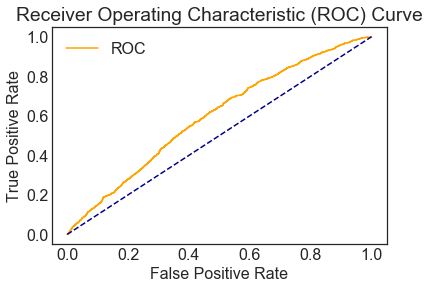

0.5962202094970849

In [171]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_probs = lr.predict_proba(X_test)
y_probs = y_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_test, y_probs)
lr_auc

In [184]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 857,  912],
       [ 587, 1162]], dtype=int64)

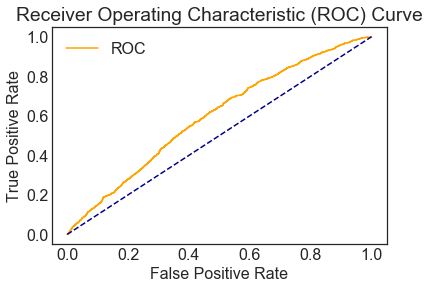

0.5945709783178525

In [172]:
y_train_probs = lr.predict_proba(X_train)
y_train_probs = y_train_probs[:, 1]
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_train, y_train_probs)
lr_auc

In [173]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.632     0.624     0.628      1769
           1      0.625     0.633     0.629      1749

    accuracy                          0.628      3518
   macro avg      0.629     0.629     0.628      3518
weighted avg      0.629     0.628     0.628      3518



In [74]:
# sns.lmplot('', 'HasDetections', data=df, logistic=True)

Linear Discriminant Analysis

In [75]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [76]:
pred = lda.fit(X_train, y_train).predict(X_test)
np.count_nonzero(pred)

1921

In [77]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.617     0.557     0.586      1769
           1      0.592     0.651     0.620      1749

    accuracy                          0.604      3518
   macro avg      0.605     0.604     0.603      3518
weighted avg      0.605     0.604     0.603      3518



In [186]:
lda_model = LinearDiscriminantAnalysis()

In [187]:
LDA = lda_model.fit_transform(X_train, y_train)

In [175]:
lda.explained_variance_ratio_

array([1.])

In [189]:
# plt.xlabel("LDA1")
# plt.ylabel("LDA2")

Quadratic Discriminant Analysis

In [78]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [79]:
np.count_nonzero(pred)

2400

In [80]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.616     0.389     0.477      1769
           1      0.550     0.755     0.636      1749

    accuracy                          0.571      3518
   macro avg      0.583     0.572     0.557      3518
weighted avg      0.583     0.571     0.556      3518



Logistic Regression

In [81]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5739056281978396

SVC 

In [82]:
smv = SVC()
smv.fit(X_train, y_train)
smv.score(X_test, y_test)

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.49715747583854464

Random Forest

In [83]:
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6165434906196703

K-Fold Cross Validation 

In [84]:
kf = KFold(n_splits=4)
for train_index, test_index in kf.split([1, 2, 3, 4, 5, 6, 7, 8, 9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 3 4 7 8] [5 6]
[0 1 2 3 4 5 6] [7 8]


Generalize Model Creation Process

In [85]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
get_score(SVC(), X_train, X_test, y_train, y_test)

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.49715747583854464

K-Nearest Neighbors

In [86]:
knn = KNeighborsClassifier(n_neighbors=60)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=3))

knn = KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=3))

knn = KNeighborsClassifier(n_neighbors=6)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=3))

[[974 795]
 [806 943]]
              precision    recall  f1-score   support

           0      0.547     0.551     0.549      1769
           1      0.543     0.539     0.541      1749

    accuracy                          0.545      3518
   macro avg      0.545     0.545     0.545      3518
weighted avg      0.545     0.545     0.545      3518

[[885 884]
 [811 938]]
              precision    recall  f1-score   support

           0      0.522     0.500     0.511      1769
           1      0.515     0.536     0.525      1749

    accuracy                          0.518      3518
   macro avg      0.518     0.518     0.518      3518
weighted avg      0.518     0.518     0.518      3518

[[1138  631]
 [1079  670]]
              precision    recall  f1-score   support

           0      0.513     0.643     0.571      1769
           1      0.515     0.383     0.439      1749

    accuracy                          0.514      3518
   macro avg      0.514     0.513     0.505      3518
w

In [87]:
def KNN(X_train, y_train, X_test, y_test, n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    return(pred, score, knn.classes_)

In [88]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.513     0.643     0.571      1769
           1      0.515     0.383     0.439      1749

    accuracy                          0.514      3518
   macro avg      0.514     0.513     0.505      3518
weighted avg      0.514     0.514     0.506      3518



Confusion Matrix

In [89]:
def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('Predicted label',rotation='horizontal', ha='right')
    plt.ylabel('True label')
    plt.show()

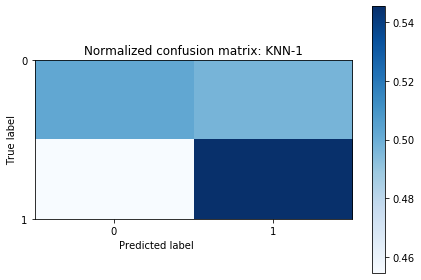

Predicted    0    1
True               
0          889  880
1          795  954
   Precision
0   0.527910
1   0.520174


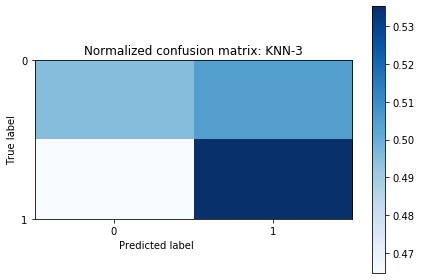

Predicted    0    1
True               
0          876  893
1          813  936
   Precision
0   0.518650
1   0.511755


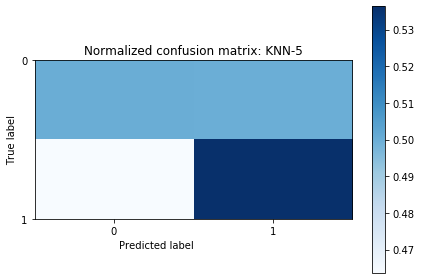

Predicted    0    1
True               
0          885  884
1          811  938
   Precision
0   0.521816
1   0.514819


In [90]:
for k in [1,3,5]:
    pred, score, classes = KNN(X_train, y_train, X_test, y_test, k)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, classes, n_neighbors=k)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    cm_df.index.name = 'True'
    cm_df.columns.name = 'Predicted'
    print(cm_df)    
    print(pd.DataFrame(precision_score(y_test, pred, average=None),
                       index=classes, columns=['Precision']))

Cross-Validation 


In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=3)
cross_val_score(RandomForestClassifier(), X_train, y_train, cv=3)
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=3)
cross_val_score(SVC(), X_train, y_train, cv=3)
cross_val_score(QuadraticDiscriminantAnalysis(), X_train, y_train, cv=3)
cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, cv=3)

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0

array([0.59019451, 0.58555437, 0.59477473])

Decision Tree 1

In [93]:
from sklearn import tree
ModelThree = tree.DecisionTreeClassifier()
ModelThree.fit(X_train, y_train)
print(ModelThree.score(X_test, y_test))

0.5537237066515065


In [94]:
y_pred = ModelThree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1769
           1       0.55      0.57      0.56      1749

    accuracy                           0.55      3518
   macro avg       0.55      0.55      0.55      3518
weighted avg       0.55      0.55      0.55      3518



Linear Model - Bayesian Ridge

In [95]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

0.05067888417155219


In [96]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1769
           1       0.55      0.57      0.56      1749

    accuracy                           0.55      3518
   macro avg       0.55      0.55      0.55      3518
weighted avg       0.55      0.55      0.55      3518



Naive Bayes Classifier

In [97]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
y_pred = gnb.predict(X_test) 

In [100]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 0.5662308129619101


In [167]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1769
           1       0.62      0.63      0.63      1749

    accuracy                           0.63      3518
   macro avg       0.63      0.63      0.63      3518
weighted avg       0.63      0.63      0.63      3518



....

In [101]:
import pydot
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Decision Tree

In [102]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
#     export_graphviz(estimator, out_file=dot_data, feature_names=X_train.columns, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [103]:
model = DecisionTreeClassifier(max_leaf_nodes=60)
# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

In [104]:
#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5949403069926095


In [105]:
clf = DecisionTreeClassifier(max_depth=6)
clf = DecisionTreeClassifier(min_samples_split=60)
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5615
           1       0.75      0.76      0.75      5641

    accuracy                           0.75     11256
   macro avg       0.75      0.75      0.75     11256
weighted avg       0.75      0.75      0.75     11256



In [106]:
clf1 = DecisionTreeClassifier(max_depth=6)
clf1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [107]:
print(classification_report(y, clf1.predict(X)))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59      8770
           1       0.61      0.70      0.65      8818

    accuracy                           0.62     17588
   macro avg       0.63      0.62      0.62     17588
weighted avg       0.63      0.62      0.62     17588



In [108]:
print(clf.score(X_train, y_train))

0.7515991471215352


In [109]:
features = ['OsBuild', 'Census_MDC2FormFactor', 
            'Census_PowerPlatformRoleName', 'Census_OSVersion', 'IsProtected',
           'Firewall']#, 'Wdft_IsGamer']#, 'Census_IsTouchEnabled', 'Census_IsPenCapable']

In [110]:
X_train_tree = df[features]
y_train_tree = df['HasDetections']
X_test_tree = df[features]
y_test_tree = df['HasDetections']

In [111]:
dt = clf.fit(X_train_tree, y_train_tree)

In [112]:
graph, = print_tree(clf, features=features, class_names=['0', '1'])
Image(graph.create_png())

In [113]:
clf_test = DecisionTreeClassifier(max_depth=60)
clf_test = DecisionTreeClassifier(min_samples_split=60)
clf_test.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
print(classification_report(y_test, clf_test.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1769
           1       0.78      0.73      0.75      1749

    accuracy                           0.76      3518
   macro avg       0.76      0.76      0.76      3518
weighted avg       0.76      0.76      0.76      3518



In [115]:
print(clf_test.score(X_test, y_test))

0.7623649801023309


In [116]:
# graph1, = print_tree(clf_test, features=features)#, class_names=['No', 'Yes'])
# Image(graph1.create_png())

Random Forest Classifier

In [117]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [118]:
y_pred = rfc.predict(X_test)

In [119]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[1104,  665],
       [ 642, 1107]], dtype=int64)

In [120]:
rfc.score(X_test, y_test)

0.6284820920977828

In [121]:
rfc2 = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
# Actual Predictions
test_pred = rfc2.predict(X_test)
test_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [123]:
train_pred = rfc2.predict(X_train)
train_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [124]:
# Probablities for each
train_prob = rfc2.predict_proba(X_train)[:, 1]
train_prob

array([0.12, 0.86, 0.19, ..., 0.82, 0.85, 0.85])

In [125]:
test_prob = rfc2.predict_proba(X_test)[:, 1]
test_prob

array([0.7 , 0.51, 0.49, ..., 0.41, 0.56, 0.54])

In [126]:
train_pred = rfc2.predict(X_train)
test_pred = rfc2.predict(X_test)

In [127]:
roc_value_train = roc_auc_score(y_train, train_prob)
roc_value_train

1.0

In [128]:
roc_value_test = roc_auc_score(y_test, test_pred)
roc_value_test

0.6259052657401581

In [129]:
#Baseline
roc_auc_score(y_test, [1 for x in range(len(y_test))])

0.5

In [130]:
from sklearn.metrics import precision_score, recall_score, roc_curve
def evaluate_model(test_pred, test_prob, train_pred, train_prob):
    baseline = {}
    baseline['Recall'] = recall_score(y_test, [1 for x in range(len(y_test))])
    baseline['Precision'] = precision_score(y_test, [1 for y in range(len(y_test))])
    baseline['ROC'] = 0.5
    
    res = {}
    res['Recall'] = recall_score(y_test, pred)
    res['Precision'] = precision_score(y_test, pred)
    res['ROC'] = roc_auc_score(y_test, test_prob)
    
    train_Res = {}
    train_Res['Recall'] = recall_score(y_train, train_pred)
    train_Res['Precision'] = precision_score(y_train, train_pred)
    train_Res['ROC'] = roc_auc_score(y_train, train_prob)
    
    for metric in ['Recall', 'Precision', 'ROC']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(res[metric], 2)} Train: {round(train_Res[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr,_ = roc_curve(y_test, [1 for z in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, test_prob)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');



Recall Baseline: 1.0 Test: 0.54 Train: 1.0
Precision Baseline: 0.5 Test: 0.51 Train: 1.0
Roc Baseline: 0.5 Test: 0.67 Train: 1.0


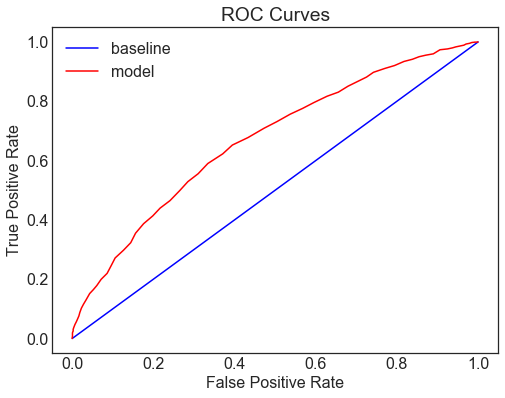

In [131]:
evaluate_model(test_pred, test_prob, train_pred, train_prob)

In [132]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="blue" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


Confusion matrix, without normalization
[[1104  665]
 [ 642 1107]]


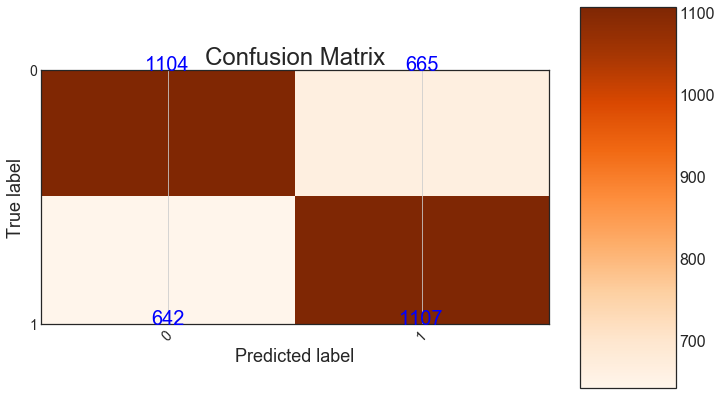

In [133]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes, title="Confusion Matrix")

Support Vector Classifer

In [134]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [135]:
# A helper function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [136]:
X_train_SVC = df[df[:-1].columns].values
y_train_SVC = df['HasDetections']

X_train_SVC[y_train_SVC == -1] = X_train_SVC[y_train_SVC == -1] +1

Text(0, 0.5, 'X2')

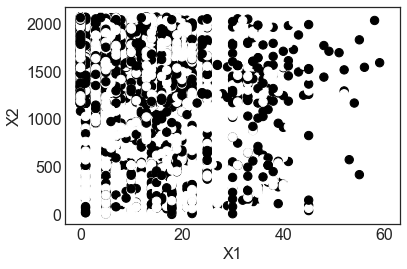

In [137]:
plt.scatter(X_train_SVC[:,0], X_train_SVC[:,1], s=70, c=y_train_SVC)
plt.xlabel('X1')
plt.ylabel('X2')

In [138]:
# svc = SVC(C=0.0001, kernel='rbf', gamma=10)
# svc.fit(X_train_SVC, y_train_SVC)

In [139]:
# plot_svc(svc, X_train_SVC, y_train_SVC)

In [140]:
# svc.support_

In [141]:
# svc2 = SVC(C=0.1, kernel='linear')
# svc2.fit(X_train_SVC, y_train_SVC)
# plot_svc(svc2, X_train_SVC, y_train_SVC)

In [142]:
# # Select the optimal C parameter by cross-validation
# tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
# clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
# clf.fit(X_train_SVC, y_train_SVC)

In [143]:
# clf.cv_results_

In [144]:
# clf.best_params_

In [145]:
# X_test_SVC = df[df[:-1].columns].values
# y_test_SVC = df['HasDetections']
# X_test_SVC[y_test_SVC == 1] = X_test_SVC[y_test_SVC == 1] -1

In [146]:
# svc2 = SVC(C=0.001, kernel='linear')
# svc2.fit(X_train_SVC, y_train_SVC)
# y_pred_SVC = svc2.predict(X_test_SVC)
# pd.DataFrame(confusion_matrix(y_test_SVC, y_pred_SVC), index=svc2.classes_, columns=svc2.classes_)

In [147]:
# X_test_SVC[y_test_SVC == 1] = X_test_SVC[y_test_SVC == 1] -1
# plt.scatter(X_test_SVC[:,0], X_test_SVC[:,1], s=70, c=y_test_SVC, cmap=mpl.cm.Paired)
# plt.xlabel('X1')
# plt.ylabel('X2')

In [148]:
# svc3 = SVC(C=1e5, kernel='linear')
# svc3.fit(X_test_SVC, y_test_SVC)
# plot_svc(svc3, X_test, y_test_SVC)

In [149]:
# svc4 = SVC(C=1, kernel='linear')
# svc4.fit(X_test_SVC, y_test_SVC)
# plot_svc(svc4, X_test_SVC, y_test_SVC)

Support Vector Machine

Text(0, 0.5, 'X2')

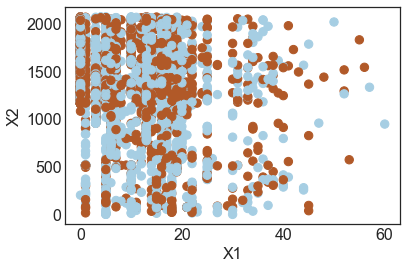

In [150]:
import matplotlib as mpl
X_SVM = df[df[:-1].columns].values
y_SVM = df['HasDetections']

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y_SVM, train_size=0.5, random_state=2)

plt.scatter(X_train_SVM[:,0], X_train_SVM[:,1], s=70, c=y_train_SVM, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [151]:
# svm = SVC(C=1, kernel='rbf', gamma=1)
# svm.fit(X_train_SVM, y_train_SVM)
# plot_svc(svm, X_test_SVM, y_test_SVM)

In [152]:
# # Increasing C parameter, allowing more flexibility
# svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
# svm2.fit(X_train_SVM, y_train_SVM)
# plot_svc(svm2, X_test_SVM, y_test_SVM)

In [153]:
# tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
#                      'gamma': [0.5, 1,2,3,4]}]
# clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
# clf.fit(X_train_SVM, y_train_SVM)
# clf.best_params_

In [154]:
# plot_svc(clf.best_estimator_, X_test_SVM, y_test_SVM)
# print(confusion_matrix(y_test_SVM, clf.best_estimator_.predict(X_test_SVM)))
# print(clf.best_estimator_.score(X_test_SVM, y_test_SVM))

ROC Curves

In [155]:
# from sklearn.metrics import auc
# from sklearn.metrics import roc_curve

In [156]:
# # More constrained model
# svm3 = SVC(C=1, kernel='rbf', gamma=1)
# svm3.fit(X_train_SVM, y_train_SVM)

In [157]:
# # More flexible model
# svm4 = SVC(C=1, kernel='rbf', gamma=50)
# svm4.fit(X_train_SVM, y_train_SVM)

In [158]:
# y_train_score3 = svm3.decision_function(X_train_SVM)
# y_train_score4 = svm4.decision_function(X_train_SVM)

In [159]:
# y_train_score3 = svm3.decision_function(X_train_SVM)
# y_train_score4 = svm4.decision_function(X_train_SVM)

# false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train_SVM, y_train_score3)
# roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

# false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train_SVM, y_train_score4)
# roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

# fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
# ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
# ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
# ax1.set_title('Training Data')

# y_test_score3 = svm3.decision_function(X_test_SVM)
# y_test_score4 = svm4.decision_function(X_test_SVM)

# false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test_SVM, y_test_score3)
# roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

# false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test_SVM, y_test_score4)
# roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

# ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
# ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
# ax2.set_title('Test Data')

# for ax in fig.axes:
#     ax.plot([0, 1], [0, 1], 'k--')
#     ax.set_xlim([-0.05, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.legend(loc="lower right")

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 

cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=3)
cross_val_score(RandomForestClassifier(), X_train, y_train, cv=3)
cross_val_score(SVC(), X_train, y_train, cv=3)
cross_val_score(QuadraticDiscriminantAnalysis(), X_train, y_train, cv=3)
cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, cv=3)

**Model Comparison**

Train

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.568767 (0.017300)
LDA: 0.589731 (0.012036)
GNB: 0.569832 (0.009790)
QDA: 0.574274 (0.018028)
KNN: 0.512526 (0.009937)
DTC: 0.551793 (0.013406)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RFC: 0.575071 (0.014460)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVM: 0.498313 (0.009064)


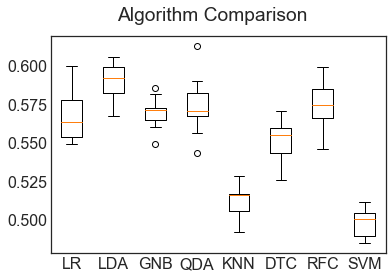

In [162]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Test

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.568799 (0.033783)
LDA: 0.593511 (0.027050)
GNB: 0.577320 (0.017419)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bibi\Anaconda3\lib\site-package

QDA: 0.523294 (0.034571)
KNN: 0.524438 (0.024781)
DTC: 0.546890 (0.023022)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RFC: 0.574177 (0.019221)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVM: 0.493752 (0.020531)


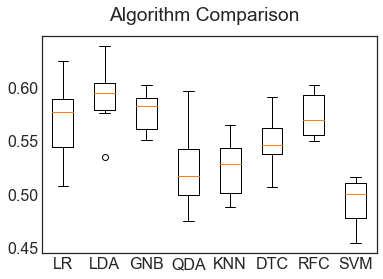

In [163]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Validation

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.558980 (0.019654)
LDA: 0.577836 (0.025515)
GNB: 0.554363 (0.020992)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA: 0.559683 (0.035597)
KNN: 0.524169 (0.022407)
DTC: 0.555434 (0.021640)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RFC: 0.563237 (0.027795)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVM: 0.507476 (0.026804)


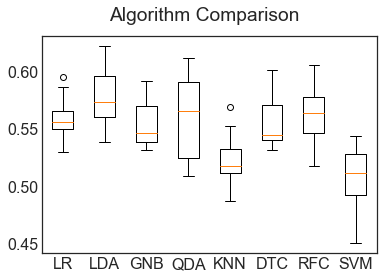

In [165]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_valid, y_valid, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 

C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.566978 (0.010489)
LDA: 0.595748 (0.010191)
GNB: 0.567888 (0.010669)
QDA: 0.575564 (0.010185)
KNN: 0.517000 (0.008816)
DTC: 0.555037 (0.009477)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RFC: 0.576472 (0.009424)


C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bibi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVM: 0.496988 (0.012620)


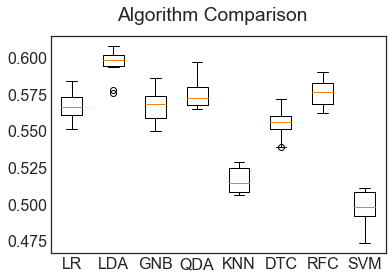

In [166]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()